# Analysis of some wavelet filters

In [1]:
import math
import numpy as np
from scipy import signal
import pylab
import pywt

In [2]:
# https://matplotlib.org/3.1.1/tutorials/text/usetex.html
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
#from matplotlib.pyplot import figure
#figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')

In [4]:
def get_filter(wavelet_name, coef_index, N):
    wavelet = pywt.Wavelet(wavelet_name)
    zeros = np.zeros(N)
    decomposition = pywt.wavedec(zeros, wavelet=wavelet, level=1, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    coefficients[coef_index] = 1
    decomposition = pywt.array_to_coeffs(coefficients, slices, output_format="wavedec")
    samples = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
    return samples

## [Haar](http://wavelets.pybytes.com/wavelet/haar/)

In [5]:
#K_0 = get_filter("haar", 0, 2)
haar_K_0 = get_filter("haar", 8, 32)
#K_1 = get_filter("haar", 1, 2)
haar_K_1 = get_filter("haar", 24,32)
print("K_0 =", haar_K_0)
print("K_1 =", haar_K_1)

K_0 = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.70710678 0.70710678
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
K_1 = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.70710678 -0.70710678
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


In [6]:
w0, haar_scaling_transfer_func = signal.freqz(haar_K_0)
w1, haar_wavelet_transfer_func = signal.freqz(haar_K_1)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


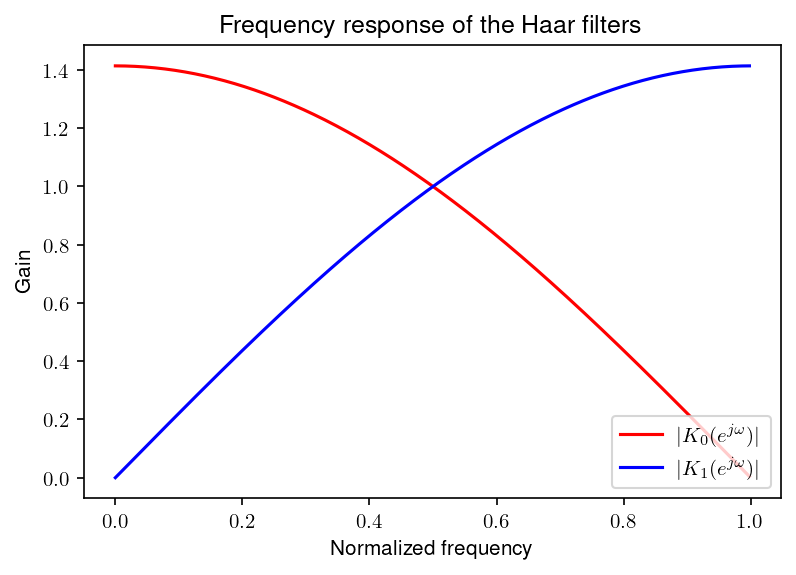

In [7]:
#pylab.figure(figsize=(12,8), dpi=150)
pylab.figure(dpi=150)
pylab.plot(w0/math.pi, np.abs(haar_scaling_transfer_func), 'r', label="$|K_0(e^{j\omega})|$")
pylab.plot(w1/math.pi, np.abs(haar_wavelet_transfer_func), 'b', label="$|K_1(e^{j\omega})|$")
#pylab.plot(w0/math.pi, np.abs(scaling_function + wavelet_function), 'g', label="$|K_0(e^{j\omega})+K_1(e^{j\omega})|$")
pylab.legend(loc='lower right')
pylab.title("Frequency response of the Haar filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Gain")
pylab.savefig("haar_modulus.svg")
pylab.savefig("haar_modulus.pdf")
pylab.show()

In [ ]:
haar_angles_sf = np.unwrap(np.angle(haar_scaling_transfer_func))[1:]
haar_angles_wf = np.unwrap(np.angle(haar_wavelet_transfer_func))[1:]

In [ ]:
pylab.figure(dpi=150)
pylab.plot(w0[1:]/math.pi, haar_angles_sf, 'r', label="arg $K_0(e^{j\omega})$")
pylab.plot(w1[1:]/math.pi, haar_angles_wf, 'b', label="arg $K_1(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Haar filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("haar_phase.svg")
pylab.savefig("haar_phase.pdf")
pylab.show()

## [Daubechies 5](http://wavelets.pybytes.com/wavelet/db5/)

In [ ]:
#K_0 = get_filter("db5", 2, 20)
db5_K_0 = get_filter("db5", 8, 32)
#K_1 = get_filter("db5", 7, 20)
db5_K_1 = get_filter("db5", 24, 32)
print("K_0 =", db5_K_0)
print("K_1 =", db5_K_1)

In [ ]:
w0, db5_scaling_transfer_func = signal.freqz(db5_K_0)
w1, db5_wavelet_transfer_func = signal.freqz(db5_K_1)

In [ ]:
pylab.figure(dpi=150)
pylab.plot(w0/math.pi, np.abs(db5_scaling_transfer_func), 'r', label="$|K_0(e^{j\omega})|$")
pylab.plot(w1/math.pi, np.abs(db5_wavelet_transfer_func), 'b', label="$|K_1(e^{j\omega})|$")
#pylab.plot(w0/math.pi, np.abs(scaling_function + wavelet_function), 'g', label="$|K_0(e^{j\omega})+K_1(e^{j\omega})|$")
pylab.legend(loc='lower right')
pylab.title("Frequency response of the Daubechies 5 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Gain")
pylab.savefig("db5_filters_response.svg")
pylab.savefig("db5_filters_response.pdf")
pylab.show()

In [ ]:
db5_angles_sf = np.unwrap(np.angle(db5_scaling_transfer_func))[1:]
db5_angles_wf = np.unwrap(np.angle(db5_wavelet_transfer_func))[1:]

In [ ]:
pylab.figure(dpi=150)
pylab.plot(w0[1:]/math.pi, db5_angles_sf, 'r', label="arg $K_0(e^{j\omega})$")
pylab.plot(w1[1:]/math.pi, db5_angles_wf, 'b', label="arg $K_1(e^{j\omega})$")
pylab.legend(loc='upper right')
pylab.title("Frequency response of the Daubechies 5 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("haar_phase.svg")
pylab.savefig("haar_phase.pdf")
pylab.show()

## [Biorthogonal 3.5](http://wavelets.pybytes.com/wavelet/bior3.5/)

In [ ]:
#bior35_K_0 = get_filter("bior3.5", 2, 12)
#bior35_K_1 = get_filter("bior3.5", 18, 24)
bior35_K_0 = get_filter("bior3.5", 8, 32)
bior35_K_1 = get_filter("bior3.5", 24, 32)
print("K_0 =", bior35_K_0)
print("K_1 =", bior35_K_1)

In [ ]:
w0, bior35_scaling_transfer_func = signal.freqz(bior35_K_0)
w1, bior35_wavelet_transfer_func = signal.freqz(bior35_K_1)

In [ ]:
pylab.figure(dpi=150)
pylab.plot(w0/math.pi, abs(bior35_scaling_transfer_func), 'r', label="$|K_0(e^{j\omega})|$")
pylab.plot(w1/math.pi, abs(bior35_wavelet_transfer_func), 'b', label="$|K_1(e^{j\omega})|$")
pylab.legend(loc='upper right')
pylab.title("Frequency response of the Biorthogonal 3.5 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Attenuation [dB]")
pylab.savefig("bior3.5_filters_response.svg")
pylab.savefig("bior3.5_filters_response.pdf")
pylab.show()

In [ ]:
bior35_angles_sf = np.unwrap(np.angle(bior35_scaling_transfer_func))[1:]
bior35_angles_wf = np.unwrap(np.angle(bior35_wavelet_transfer_func))[1:]

In [ ]:
pylab.figure(dpi=150)
pylab.plot(w0[1:]/math.pi, bior35_angles_sf, 'r', label="arg $K_0(e^{j\omega})$")
pylab.plot(w1[1:]/math.pi, bior35_angles_wf, 'b', label="arg $K_1(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

## Comparing

In [ ]:
pylab.figure(dpi=150)
pylab.plot(w0/math.pi, abs(haar_scaling_transfer_func), 'r', label="Haar")
pylab.plot(w0/math.pi, abs(db5_scaling_transfer_func), 'g', label="Daubechies 5")
pylab.plot(w0/math.pi, abs(bior35_scaling_transfer_func), 'b', label="Biorthogonal 5.3 ")
pylab.legend(loc='upper right')
pylab.title("Frequency response of low-pass filters $|K_0(e^{j\omega})|$")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Attenuation [dB]")
pylab.savefig("comparative_filters_response.svg")
pylab.savefig("comparative_filters_response.pdf")
pylab.show()

In [ ]:
# Ignore the rest

In [ ]:
X = np.ones(512)
x = np.fft.irfft(X)

In [ ]:
pylab.plot(np.arange(1022), x, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [ ]:
wavelet = pywt.Wavelet("bior3.5")
decomposition = pywt.wavedec(x, wavelet=wavelet, level=1, mode="per")
y = pywt.waverec(decomposition, wavelet=wavelet, mode="per")

In [ ]:
Y = np.fft.rfft(y)

In [ ]:
pylab.plot(np.arange(512), Y, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [ ]:
x = np.random.random(1024)-0.5
X = np.fft.rfft(x)

In [ ]:
pylab.plot(np.arange(513), X, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [ ]:
wavelet = pywt.Wavelet("bior3.5")
decomposition = pywt.wavedec(x, wavelet=wavelet, level=1, mode="per")
y = pywt.waverec(decomposition, wavelet=wavelet, mode="per")
Y = np.fft.rfft(y)

In [ ]:
pylab.plot(np.arange(513), Y, 'r', label="arg $K_0(e^{j\omega})$")
pylab.legend(loc='lower left')
pylab.title("Frequency response of the Biorthogonal 5.3 filters")
pylab.xlabel("Normalized frequency")
pylab.ylabel("Angle (radians)")
pylab.savefig("bior5.3_phase.svg")
pylab.savefig("bior5.3_phase.pdf")
pylab.show()

In [ ]:
def get_filter(wavelet_name, coef_index, N):
    wavelet = pywt.Wavelet(wavelet_name)
    coefficients = np.zeros(N)
    coefficients[coef_index] = 1
    decomposition = pywt.wavedec(coefficients, wavelet=wavelet, level=1, mode="per")
    coefficients, slices = pywt.coeffs_to_array(decomposition)
    return coefficients

In [ ]:
# http://wavelets.pybytes.com/wavelet/bior3.5/
K_0 = get_filter("bior3.5", 6, 12)
K_1 = get_filter("bior3.5", 22, 48)
print("K_0 =", K_0)
print("K_1 =", K_1)

In [ ]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Tahoma']
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot([1, 2, 3], label='test')

ax.legend()
plt.show()